#### Notebook used for initial cleaning of UP-Baguio, TSU, and CHED datasets

In [127]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [128]:
def validate_research_profile(df):
    """ Asserts to check correctness of columns
    """
    # validate number of sheets
    assert len(df.keys()) == 7
    
    # validate research_profile
    # check correctness of columns
    assert len(df['Research Profile'].columns) == 24 
    assert df['Research Profile'].columns[3] == 'Abstract'
    assert 'Status' in df['Research Profile'].columns[-1]
    # no research title that are none
    assert (len(df['Research Profile']['Research Title']) == 
            len(df['Research Profile']['Research Title'].dropna()))
    
    # check unique columns
    unique_cols = ['University (Full Name)', 'University (Abbreviation)',
                   'City/Municipality', 'Province', 'Region',
                  ]
    for col in unique_cols:
        assert len(df['Research Profile'][col].unique()) == 1, col
    
    
    # check numerical columns
    numeric_col = ['Year Published', 'Volume No', 'Issue No',
                   'SDG', 'NEDA Priority Area']
    
    for col in numeric_col:
        assert is_numeric_dtype(df['Research Profile'][col]), col
        
    # check columns with choices
    for i in (df['Research Profile']['Local/International']
               .unique().tolist()):
        assert i in ['International', 'Local']
        
    for i in (df['Research Profile']['Status \n(Completed/On going)']
               .unique().tolist()):
        assert i in ['Completed', 'On going']


# UP Baguio

## Research Profile

In [129]:
df_up = pd.read_excel('UP_Baguio_ERSUv2.xlsx', sheet_name=None)
res_prop = df_up['Research Profile'].copy()

In [130]:
df_up['Research Profile']

,University of the Philippines Baguio Published Researches and Book Chapters,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Research Title,Author,Keywords,Abstract,Year (YYYY),University (Full Name),University (Abbreviation),Campus,City/Municipality,Province,...,Year Published,Number of Citations as of Jan 2022,Local/International,"Allocated Budget (PH Pesos) 1,000,000.00",Source,Funding Agency,"Type\n(Grant, Commissioned)",Status \n(Completed/On going),NaN,NaN
3,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Rubus fraxinifolius Poir. Rosaceae,Maverick N. Tamayo; Zenaida G. Baoanan,NaN,NaN,15,"Priority 3: ""Pag-unlad"" Increasing Growth Pote...",2020,University of the Philippines Baguio,UPB,Baguio,...,2020,NaN,Local,NaN,NaN,NaN,NaN,Completed,NaN,NaN
161,The Effects of a Table Tennis Physical Educati...,Fernando P. Florendo,NaN,NaN,3,"Priority 2: ""Pagbabago"" Inequality reducing tr...",2020,University of the Philippines Baguio,UPB,Baguio,...,2020,NaN,Local,NaN,NaN,NaN,NaN,Completed,NaN,NaN
162,Discursive Experiments in Vernacularizing Inte...,Adonis Ramy L. Elumbre,NaN,NaN,4,"Priority 2: ""Pagbabago"" Inequality reducing tr...",2020,University of the Philippines Baguio,UPB,Baguio,...,2020,NaN,Local,NaN,NaN,NaN,NaN,Completed,NaN,NaN
163,Disaster Risk Governance in Northern Philippin...,Leah E. Abayao,NaN,NaN,11,"Priority 2: ""Pagbabago"" Inequality reducing tr...",2020,University of the Philippines Baguio,UPB,Baguio,...,2020,NaN,Local,1900000,Internal,Cordillera Studies Center,Grant,Completed,NaN,NaN


In [131]:
res_prop.columns = res_prop.iloc[2].to_list()

In [132]:
res_prop = res_prop.iloc[3:, :-2]

In [133]:
res_prop  = res_prop[~res_prop['Author'].isnull()]

In [134]:
# erroneous rows
df_temp = res_prop.loc[144:,:].iloc[:, 4:6].copy()
df_update = res_prop.loc[144:,:].iloc[:, 6:13]

res_prop.iloc[133:,4:11] = df_update.to_numpy()

res_prop.iloc[133:,11:13] = df_temp.to_numpy()

In [135]:
numeric_col = ['Year (YYYY)','Year Published', 'Volume No', 'Issue No',
               'SDG', 'NEDA Priority Area', 'Number of Citations as of Jan 2022',
              'Allocated Budget (PH Pesos) 1,000,000.00']

for i in res_prop.columns:
    try:
        if i not in numeric_col:
            res_prop[i] = res_prop[i].str.strip()
        else:

            res_prop[i] = pd.to_numeric(res_prop[i])
    except:
        print(i)

NEDA Priority Area
Volume No
Issue No


In [136]:
res_prop['University (Full Name)'] = (res_prop['University (Full Name)']
                        .str.replace('Univesity of the Philippines Baguio', 
                                    'University of the Philippines Baguio'))

In [137]:
res_prop['Province'] = (res_prop['Province'].str.replace('Baguio', 
                        'Benguet'))

In [138]:
res_prop['Region'] = (['Cordillera Administrative Region'] 
                        * len(res_prop))

In [139]:
res_prop['Status \n(Completed/On going)'] = (res_prop['Status \n(Completed/On going)']
                                                              .str.replace(r'Complete\b', 'Completed',
                                                                          regex=True))

In [140]:
res_prop['Local/International'].unique()

array(['International', 'Local', nan], dtype=object)

In [141]:
def fix_order_names(names):
    new_names = []
    for name in names:
        name = name.title()
        name = name.strip()
        if ',' not in name:
            name = name.split(' ')
            name = name[-1] + ', ' + ' '.join(name[0:-1])
        new_names.append(name.strip())
    return ';'.join(new_names)

res_prop['Author'] = (res_prop['Author'].str.replace(r'\sand\s', ';', 
                                                     regex=True)
                      .str.split(';')).apply(lambda x: fix_order_names(x))

In [142]:
res_prop

,Research Title,Author,Keywords,Abstract,Year (YYYY),University (Full Name),University (Abbreviation),Campus,City/Municipality,Province,...,Volume No,Issue No,Year Published,Number of Citations as of Jan 2022,Local/International,"Allocated Budget (PH Pesos) 1,000,000.00",Source,Funding Agency,"Type\n(Grant, Commissioned)",Status \n(Completed/On going)
5,A Rhetorical Analysis of Isabelo F. de los Rey...,"Jularbal, Io M.",NaN,El Tinguian published in 1888 was considered a...,2017.0,University of the Philippines Baguio,UPB,Baguio,Baguio,Benguet,...,14,2,2017.0,NaN,International,NaN,NaN,NaN,NaN,Completed
6,An application of seasonal ARIMA models on gro...,"Addawe, Rizavel",NaN,The increase in the merchandise exports of the...,2017.0,University of the Philippines Baguio,UPB,Baguio,Baguio,Benguet,...,1905,1,2017.0,1.0,International,NaN,NaN,NaN,NaN,Completed
7,Prediction of South China sea level using seas...,"Addawe, Rizavel",NaN,Accelerating sea level rise is an indicator of...,2017.0,University of the Philippines Baguio,UPB,Baguio,Baguio,Benguet,...,1905,1,2017.0,3.0,International,NaN,NaN,NaN,NaN,Completed
8,Treatment on outliers in UBJ-SARIMA models for...,"Magsakay, Clarenz B.;De Vera, Nora U.;Libatiqu...",NaN,Dengue vaccination has become a breakthrough i...,2017.0,University of the Philippines Baguio,UPB,Baguio,Baguio,Benguet,...,NaN,NaN,NaN,2.0,International,NaN,NaN,NaN,NaN,Completed
9,Imaging the indigenous in Philippine Environme...,"Telles, Jason Paolo R.","Indigenous Peoples, Media Ecocriticism, Enviro...","Various mass media products, even those that a...",NaN,University of the Philippines Baguio,UPB,Baguio,Baguio,Benguet,...,2,3,2017.0,NaN,Local,NaN,NaN,NaN,NaN,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Rubus fraxinifolius Poir. Rosaceae,"Tamayo, Maverick N.;Baoanan, Zenaida G.",NaN,NaN,2020.0,University of the Philippines Baguio,UPB,Baguio,Baguio,Benguet,...,NaN,NaN,2020.0,NaN,Local,NaN,NaN,NaN,NaN,Completed
161,The Effects of a Table Tennis Physical Educati...,"Florendo, Fernando P.",NaN,NaN,2020.0,University of the Philippines Baguio,UPB,Baguio,Baguio,Benguet,...,NaN,NaN,2020.0,NaN,Local,NaN,NaN,NaN,NaN,Completed
162,Discursive Experiments in Vernacularizing Inte...,"Elumbre, Adonis Ramy L.",NaN,NaN,2020.0,University of the Philippines Baguio,UPB,Baguio,Baguio,Benguet,...,NaN,NaN,2020.0,NaN,Local,NaN,NaN,NaN,NaN,Completed
163,Disaster Risk Governance in Northern Philippin...,"Abayao, Leah E.",NaN,NaN,2020.0,University of the Philippines Baguio,UPB,Baguio,Baguio,Benguet,...,NaN,NaN,2020.0,NaN,Local,1900000.0,Internal,Cordillera Studies Center,Grant,Completed


In [1]:
df_up['Research Profile'] = res_prop.copy()
validate_research_profile(df_up)

### UP Baguio concerns

In [144]:
df_up['Research Profile']['Volume No'].unique()

array([14, 1905, nan, 2, 6, 28, 7, 9, 100, 16, 26, 3, 'ISSN 0119-1144',
       25, 22, 90, 11, 1937, 17, 5, 38, 343, 229, 8, 13, 41, 4, 10, 12,
       47, 76, 40, 0, 30, 56, 295, 2019, 20, 31, 43, 29, 67, 21, 1593, 18,
       2020, 455, 468, 107, 75, 19], dtype=object)

In [145]:
df_up['Research Profile'][df_up['Research Profile']['Volume No'] == 'ISSN 0119-1144']

,Research Title,Author,Keywords,Abstract,Year (YYYY),University (Full Name),University (Abbreviation),Campus,City/Municipality,Province,...,Volume No,Issue No,Year Published,Number of Citations as of Jan 2022,Local/International,"Allocated Budget (PH Pesos) 1,000,000.00",Source,Funding Agency,"Type\n(Grant, Commissioned)",Status \n(Completed/On going)
44,Assessment of the Benthic resources of the Ben...,"Dizon, Romeo",NaN,NaN,2017.0,University of the Philippines Baguio,UPB,Baguio,Baguio,Benguet,...,ISSN 0119-1144,NaN,NaN,NaN,International,NaN,NaN,NaN,NaN,Completed


In [146]:
df_up['Research Profile']['Issue No'].unique()

array([2, 1, nan, 3, 893, 7, 6, 8, 4, 'Article 159', 2018, 23, 12, 11],
      dtype=object)

In [147]:
df_up['Research Profile'][df_up['Research Profile']['Issue No'] == 'Article 159']

,Research Title,Author,Keywords,Abstract,Year (YYYY),University (Full Name),University (Abbreviation),Campus,City/Municipality,Province,...,Volume No,Issue No,Year Published,Number of Citations as of Jan 2022,Local/International,"Allocated Budget (PH Pesos) 1,000,000.00",Source,Funding Agency,"Type\n(Grant, Commissioned)",Status \n(Completed/On going)
61,Erythromycin in Exposure Disrupts the Life Cyc...,"Calma, Mayer L.;Asiss, Joannes Luke B.;Medina,...",Erythromycin in Exposure Disrupts the Life Cyc...,Erythromycin is one of the most widely used an...,2018.0,University of the Philippines Baguio,UPB,Baguio,Baguio,Benguet,...,229,Article 159,2018.0,2.0,International,NaN,NaN,NaN,NaN,Completed


## Utilization

In [148]:
df_up = pd.read_excel('UP_Baguio_ERSU.xlsx', sheet_name=None)
df_up['Utilization'] = df_up.pop('Utlization')

In [149]:
util = df_up['Utilization']

In [150]:
util.columns = util.iloc[2].to_list()

In [151]:
util = util.iloc[3:, 1:6]

In [152]:
util

,Research Title,Product/Service,Beneficiary,Campus,Year
3,Popularizing Access to Biodiversity Informatio...,"training modules, biodiversity database, coffe...",local government units in Northern Luzon,Baguio,2018-2020
4,Hazard Assessment of 2/3 of the Philippines Us...,storm warning app in cellphone; hazard maps,local government units in Northern Luzon,Baguio,2015-2018
5,"TLDC Project 3 ""Online Database System for Med...",database on medicinal plants in the Cordillera,"indigenous communities in Northern Luzon, part...",Baguio,2019-2020
6,Harnessing the potential of plant resources in...,various food and beauty products,"indigenous communities, potential entrepreneurs",Baguio,2019-2020
7,Physiological Aspects of Cordillera Weaving in...,redesigned loom weaving chair,loom weavers of the Cordillera,Baguio,2021
8,Digitizing Traditional Textiles,extant textiles that weavers had not produced ...,Cordillera weavers,Baguio,2017-2019


In [153]:
univ_prof = df_up['University Profile']

In [154]:
univ_prof

,SUC Name,Acronym,Classification Level
0,University of the Philippines Baguio,UPB,autonomous


In [155]:
df_up['Patents']

,Research Title,Patent Filed,Patent Type,Patent Status,Date of Registration,Registration Number,Author,University
0,White Peanut Cookies with Seaweed (Eucheuma co...,White Peanut Cookies with Seaweed (Eucheuma co...,Patent,Registered with Certificate,2021-03-24,O-2021-00368,"Baldapan, Angeline D. ;Elegio, Jefferson F.",Bohol Island State University


In [156]:
res_prop['NEDA Priority Area'] = res_prop['NEDA Priority Area'].str.replace(r'.*?(\d?).*?', r'\1', regex=True)

In [157]:
res_prop['NEDA Priority Area']

5      1
6      2
7      3
8      2
9      2
      ..
160    3
161    2
162    2
163    2
164    2
Name: NEDA Priority Area, Length: 154, dtype: object

In [158]:
out_fname = 'UPB_Clean.xlsx'
writer = pd.ExcelWriter(out_fname)


res_prop.to_excel(writer, 
                  sheet_name='Research Profile', 
                  index=False)

util.to_excel(writer, 
              sheet_name='Utilization', 
              index=False)

univ_prof.to_excel(writer, 
              sheet_name='University Profile', 
              index=False)

writer.save()

# EDA

In [93]:
res_prop.Author.str.split(';').explode().value_counts().head(50)

Salvador-Amores, Analyn V.             13
Abansi, Corazon L.                      7
Telles, Jason Paolo R.                  7
Collera, Juancho A.                     7
Agulo, Ian Jasper A.                    5
Balmores-Paulino, Rozel S.              5
Lazaga, Junley L.                       5
Abayao, Leah E.                         5
Addawe, Rizavel C.                      4
Addawe, Rizavel                         4
Tamayo, Maverick N.                     4
Bacani, Jerico B.                       3
Rabago, Julius Fergy T.                 3
Abalos, Cecilia Fe S.                   3
Agra, Kelly Louise Rexzy P.             3
Addawe, Joel                            3
Saito, Takeshi                          3
Alangui, Wilfredo V.                    3
Bustamante, Rene Alfred Anton           3
Elumbre, Adonis Ramy L.                 3
Baoanan, Zenaida G.                     3
Ilasin, Mark                            2
Pascua, Chelo S.                        2
Peralta, Gilbert R.               

In [94]:
res_prop.Author.str.split(';').explode().value_counts().tail(50)

Perez, Edgar                    1
Figueroa, Viviana E.            1
Molnár, Zsolt                   1
Aumeeruddy-Thomas, Yildiz       1
Bridgewater, Peter              1
Tengö, Maria                    1
Thaman, Randy                   1
Berkes, Fikret                  1
Carino, Joji                    1
Cunha, Manuela Carneiro Da      1
Cdiaw, Mariteuw                 1
Díaz, Sandra                    1
Fisher, Judy                    1
Tolentino, Gail Cabacungan      1
Hardison, Preston               1
Kaoruichikawa,                  1
Kariuki, Peris                  1
Karki, Madhav                   1
Oblyver, Phil                   1
Malmer, Pernilla                1
Masardule, Onel                 1
Yeboah, Alfred A. Oteng         1
Pacheco, Diego                  1
Pataridze, Tamar                1
Çiğdemadem,                     1
Rosemaryhill,                   1
Balangcod, Teodora M.           1
Cuevas, Virginia C.             1
Andalis, Maranatha Del Moro     1
Madarang, May 

<AxesSubplot:ylabel='Frequency'>

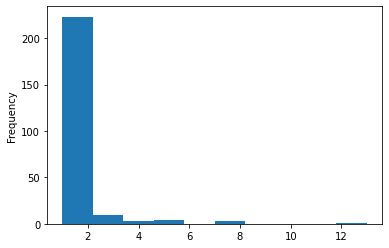

In [95]:
res_prop.Author.str.split(';').explode().value_counts().plot.hist()

<AxesSubplot:>

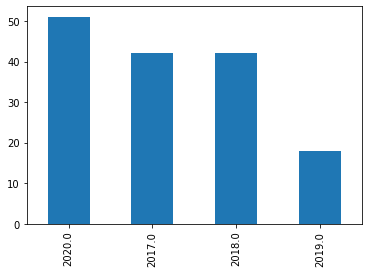

In [96]:
res_prop['Year (YYYY)'].value_counts().plot.bar()

<AxesSubplot:>

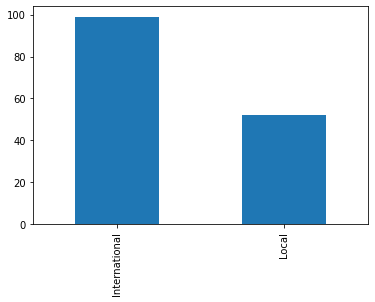

In [97]:
res_prop['Local/International'].value_counts().plot.bar()

In [98]:
res_prop.iloc[:, -1].value_counts()

Completed    154
Name: Status \n(Completed/On going), dtype: int64

<AxesSubplot:xlabel='Year (YYYY)'>

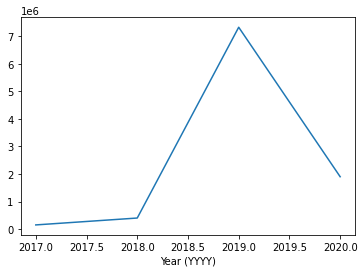

In [99]:
res_prop.iloc[:, [4, -5]].dropna().groupby('Year (YYYY)')['Allocated Budget (PH Pesos) 1,000,000.00'].sum().plot()

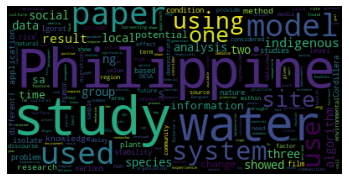

In [100]:
wordcloud = WordCloud().generate(' '.join(res_prop['Abstract'].dropna()))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

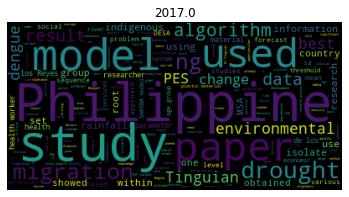

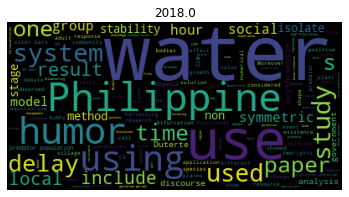

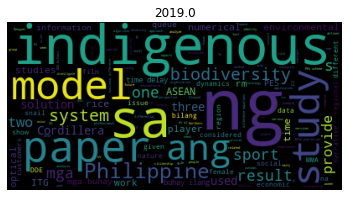

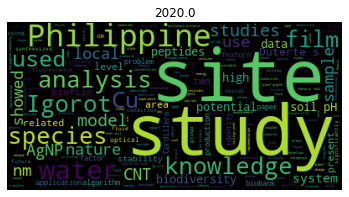

In [101]:
for year in res_prop['Year (YYYY)'].unique():
    wc_year = res_prop[res_prop['Year (YYYY)'] == year]
    try:
        wordcloud = WordCloud().generate(' '.join(wc_year['Abstract'].dropna()))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(year)
        plt.show()
    except:
        pass

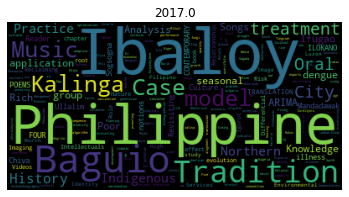

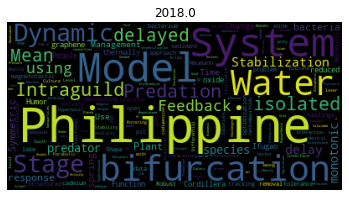

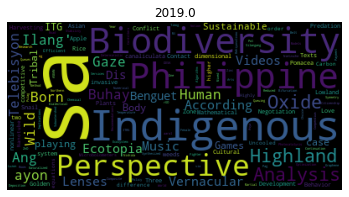

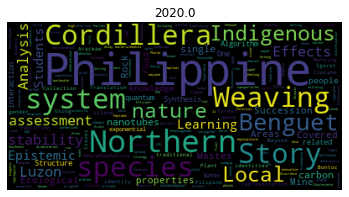

In [102]:
for year in res_prop['Year (YYYY)'].unique():
    wc_year = res_prop[res_prop['Year (YYYY)'] == year]
    try:
        wordcloud = WordCloud().generate(' '.join(wc_year['Research Title'].dropna()))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(year)
        plt.show()
    except:
        pass

In [103]:
res_prop['Number of Citations as of Jan 2022'].dropna()

6        1.0
7        3.0
8        2.0
38       4.0
45      10.0
47       9.0
56       2.0
59       8.0
61       2.0
66       1.0
67       2.0
70      19.0
74       2.0
95       2.0
96       2.0
100      1.0
101      2.0
102      4.0
114      2.0
115      1.0
116      1.0
117    100.0
118      4.0
120      2.0
122      4.0
124      6.0
125      4.0
128      1.0
129      2.0
130      3.0
132      1.0
134      2.0
135      2.0
136      6.0
137      4.0
138      2.0
141      3.0
Name: Number of Citations as of Jan 2022, dtype: float64

<AxesSubplot:>

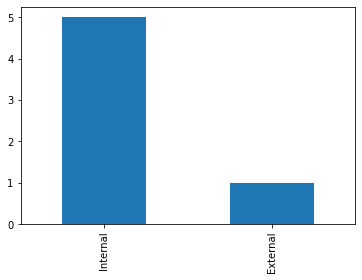

In [104]:
res_prop.Source.dropna().value_counts().plot.bar()

<AxesSubplot:>

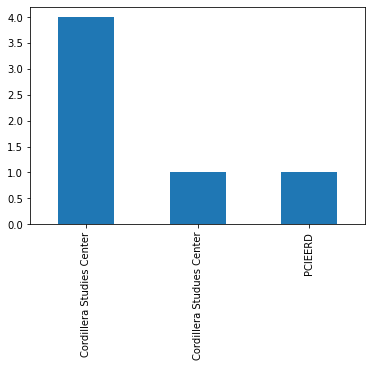

In [105]:
res_prop['Funding Agency'].dropna().value_counts().plot.bar()

<AxesSubplot:>

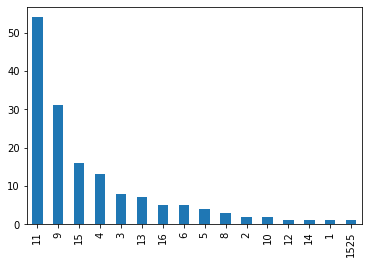

In [106]:
res_prop['SDG'].dropna().value_counts().plot.bar()

<AxesSubplot:>

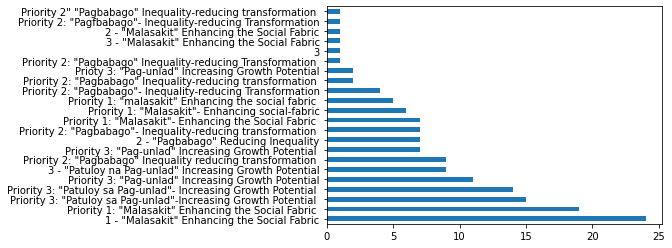

In [107]:
res_prop['NEDA Priority Area'].dropna().value_counts().plot.barh()

# TSU

In [159]:
df_tsu = pd.read_excel('ERSU6_TSU_Data.xlsx', sheet_name=None)
res_prop_tsu = df_tsu['Research Profile'].copy()

In [160]:
numeric_col = ['Year (YYYY)','Year Published', 'Volume No', 'Issue No',
               'SDG', 'NEDA Priority Area', 'Number of Citations as of Jan 2022',
              'Allocated Budget (PH Pesos) 1,000,000.00']

for i in res_prop_tsu.columns:
    try:
        if i not in numeric_col:
            res_prop_tsu[i] = res_prop_tsu[i].str.strip()
        else:

            res_prop_tsu[i] = pd.to_numeric(res_prop_tsu[i])
    except:
        print(i)

NEDA Priority Area
Allocated Budget (PH Pesos) 1,000,000.00


In [161]:
res_prop_tsu = res_prop_tsu.iloc[2:]
df_tsu['Research Profile'] = res_prop_tsu.copy()
validate_research_profile(df_tsu)

In [164]:
df_tsu['Research Profile']

,Research Title,Author,Keywords,Abstract,Year (YYYY),University (Full Name),University (Abbreviation),Campus,City/Municipality,Province,...,Volume No,Issue No,Year Published,Number of Citations as of Jan 2022,Local/International,"Allocated Budget (PH Pesos) 1,000,000.00",Source,Funding Agency,"Type\n(Grant, Commissioned)",Status \n(Completed/On going)
2,Implementation of a Bit Permutation-based Adva...,"Gamido, Heidilyn V.","Avalanche effect, Encryption, Image encryption...",The paper proposes a modification of the...,2020,Tarlac State University,TSU,San isidro,Tarlac City,Tarlac,...,19.0,3.0,2020,1,International,74024.3,Internal,None,NaN,Completed
3,Pre-service Teachers’ Reflection Logs: Pieces ...,"Mendoza, Jasper Jay N.","MAPEH, Pre-service taechers, Emancipation, tra...",With critical social design put into pra...,2020,Tarlac State University,TSU,Lucinda,Tarlac City,Tarlac,...,9.0,6.0,2020,0,International,60381.25,Internal,None,NaN,Completed
4,Evidence of Transformative Teaching Extracted ...,"Mendoza, Jasper Jay N.","Butin's model, MAPEH, Pre-service teachers, Tr...","This study aimed to analyze the Music, Arts, P...",2020,Tarlac State University,TSU,Lucinda,Tarlac City,Tarlac,...,9.0,2.0,2020,0,International,117318.89,Internal,None,NaN,Completed
5,"Social Network Marketing of Micro, Small and M...","Abalos, Winston F.","Social Networking Sites, MSME, Marketing",The study aimed to determine the profile of Mi...,2020,Tarlac State University,TSU,Main,Tarlac City,Tarlac,...,9.0,2.0,2020,0,International,0,Internal,None,NaN,Completed
6,Readiness and Willingness of the Enterprises i...,"Budomo, Xerxes M.","Work Immersion, Senior High Shool, Enterprises",This study determined and described the readin...,2020,Tarlac State University,TSU,Main,Tarlac City,Tarlac,...,9.0,4.0,2020,0,International,0,Internal,None,NaN,Completed
7,Methylene blue removal by poly(acrylic acid)-g...,"Dancel, Gian Carlo; Pomicpic, Janronel; Cabala...","Methylene blue, Adsorption, Irradiation, Graft...",This work aimed to synthesize poly(acrylic aci...,2020,Tarlac State University,TSU,Lucinda,Tarlac City,Tarlac,...,172.0,2020.0,2020,0,International,0,Internal,None,NaN,Completed
8,The Role of Authentic Leadership and Authentic...,"Sunga, Lucila O.","Authentic Leadership, Authentic Fellowership, ...",This study aimed to examine the extent of rela...,2020,Tarlac State University,TSU,Lucinda,Tarlac City,Tarlac,...,NaN,NaN,2020,0,International,0,Internal,None,NaN,Completed
9,A Study on Job Satisfaction and Professionalis...,"Lee, Jiyoung","Childcare Teacher, Job Satisfaction, Professio...",The intention to stay of childcare teachers is...,2020,Tarlac State University,TSU,Main,Tarlac City,Tarlac,...,8.0,10.0,2020,0,International,0,Internal,None,NaN,Completed
10,The Effects of Childcare Teachers’ Interperson...,"Lee, Jiyoung","Childcare Teacher, Interpersonal stress, Teach...",CCTV perception is recognized as one of the ma...,2020,Tarlac State University,TSU,Main,Tarlac City,Tarlac,...,12.0,6.1,2020,0,International,0,Internal,None,NaN,Completed
11,Effects of a Working Environment Causing Exhau...,"Lee, Jiyoung","Working environment, Exhaustion, Job stress, C...",This study examines how a working environment ...,2020,Tarlac State University,TSU,Main,Tarlac City,Tarlac,...,8.0,5.0,2020,0,International,0,Internal,None,NaN,Completed


In [165]:
res_prop_tsu['NEDA Priority Area'] = res_prop_tsu['NEDA Priority Area'].str.replace(r'.*?(\d?).*?', r'\1', regex=True)

In [168]:
res_prop_tsu

,Research Title,Author,Keywords,Abstract,Year (YYYY),University (Full Name),University (Abbreviation),Campus,City/Municipality,Province,...,Volume No,Issue No,Year Published,Number of Citations as of Jan 2022,Local/International,"Allocated Budget (PH Pesos) 1,000,000.00",Source,Funding Agency,"Type\n(Grant, Commissioned)",Status \n(Completed/On going)
2,Implementation of a Bit Permutation-based Adva...,"Gamido, Heidilyn V.","Avalanche effect, Encryption, Image encryption...",The paper proposes a modification of the...,2020,Tarlac State University,TSU,San isidro,Tarlac City,Tarlac,...,19.0,3.0,2020,1,International,74024.3,Internal,None,NaN,Completed
3,Pre-service Teachers’ Reflection Logs: Pieces ...,"Mendoza, Jasper Jay N.","MAPEH, Pre-service taechers, Emancipation, tra...",With critical social design put into pra...,2020,Tarlac State University,TSU,Lucinda,Tarlac City,Tarlac,...,9.0,6.0,2020,0,International,60381.25,Internal,None,NaN,Completed
4,Evidence of Transformative Teaching Extracted ...,"Mendoza, Jasper Jay N.","Butin's model, MAPEH, Pre-service teachers, Tr...","This study aimed to analyze the Music, Arts, P...",2020,Tarlac State University,TSU,Lucinda,Tarlac City,Tarlac,...,9.0,2.0,2020,0,International,117318.89,Internal,None,NaN,Completed
5,"Social Network Marketing of Micro, Small and M...","Abalos, Winston F.","Social Networking Sites, MSME, Marketing",The study aimed to determine the profile of Mi...,2020,Tarlac State University,TSU,Main,Tarlac City,Tarlac,...,9.0,2.0,2020,0,International,0,Internal,None,NaN,Completed
6,Readiness and Willingness of the Enterprises i...,"Budomo, Xerxes M.","Work Immersion, Senior High Shool, Enterprises",This study determined and described the readin...,2020,Tarlac State University,TSU,Main,Tarlac City,Tarlac,...,9.0,4.0,2020,0,International,0,Internal,None,NaN,Completed
7,Methylene blue removal by poly(acrylic acid)-g...,"Dancel, Gian Carlo; Pomicpic, Janronel; Cabala...","Methylene blue, Adsorption, Irradiation, Graft...",This work aimed to synthesize poly(acrylic aci...,2020,Tarlac State University,TSU,Lucinda,Tarlac City,Tarlac,...,172.0,2020.0,2020,0,International,0,Internal,None,NaN,Completed
8,The Role of Authentic Leadership and Authentic...,"Sunga, Lucila O.","Authentic Leadership, Authentic Fellowership, ...",This study aimed to examine the extent of rela...,2020,Tarlac State University,TSU,Lucinda,Tarlac City,Tarlac,...,NaN,NaN,2020,0,International,0,Internal,None,NaN,Completed
9,A Study on Job Satisfaction and Professionalis...,"Lee, Jiyoung","Childcare Teacher, Job Satisfaction, Professio...",The intention to stay of childcare teachers is...,2020,Tarlac State University,TSU,Main,Tarlac City,Tarlac,...,8.0,10.0,2020,0,International,0,Internal,None,NaN,Completed
10,The Effects of Childcare Teachers’ Interperson...,"Lee, Jiyoung","Childcare Teacher, Interpersonal stress, Teach...",CCTV perception is recognized as one of the ma...,2020,Tarlac State University,TSU,Main,Tarlac City,Tarlac,...,12.0,6.1,2020,0,International,0,Internal,None,NaN,Completed
11,Effects of a Working Environment Causing Exhau...,"Lee, Jiyoung","Working environment, Exhaustion, Job stress, C...",This study examines how a working environment ...,2020,Tarlac State University,TSU,Main,Tarlac City,Tarlac,...,8.0,5.0,2020,0,International,0,Internal,None,NaN,Completed


In [169]:
out_fname = 'TSU_Clean.xlsx'
writer = pd.ExcelWriter(out_fname)


res_prop_tsu.to_excel(writer, 
                  sheet_name='Research Profile', 
                  index=False)

# util.to_excel(writer, 
#               sheet_name='Utilization', 
#               index=False)

# univ_prof.to_excel(writer, 
#               sheet_name='University Profile', 
#               index=False)

writer.save()

Note on patent type and patent status

# CHED

In [170]:
df_ched = pd.read_excel('CHED_Funded_Research_Projects_of_SUCs.xlsx', 
                       sheet_name=None)


In [171]:
df_ched['Research Profile']['Author'] = (df_ched['Research Profile']['Author']
                                     .str.replace('Dr.', '', regex=False)
                                     .str.replace('Prof.', '', regex=False)
                                     .str.replace('Ph.D.', '', regex=False)
                                     .str.replace('MSDA', '', regex=False)
                                     .str.replace('MIH', '', regex=False)
                                     .str.replace('LPT', '', regex=False)
                                     .str.replace('MMA', '', regex=False)
                                     .str.replace('Engr.', '', regex=False)
                                     .str.replace('Ms.', '', regex=False)
                                     .str.replace('MAEd', '', regex=False)
                                     .str.replace('Rd.', '', regex=False)
                                     .str.replace('/', '', regex=False)
                                     .str.replace(',', '', regex=False)
                                     .str.strip()
                                     .str.title()
                                     )

In [172]:
def fix_order_names(names):
    new_names = []
    for name in names:
        if ',' not in name:
            name = name.split(' ')
            name = name[-1] + ', ' + ' '.join(name[0:-1])
        new_names.append(name.strip())
    return ';'.join(new_names)

df_ched['Research Profile']['Author'] = (df_ched['Research Profile']['Author']
                        .str.split(';')).apply(lambda x: fix_order_names(x))

In [173]:
df_ched['Research Profile']

,Research Title,Author,Keywords,Abstract,Year (YYYY),University (Full Name),University (Abbreviation),Campus,City/Municipality,Province,...,Volume No,Issue No,Year Published,Number of Citations as of Jan 2022,Local/International,"Allocated Budget (PH Pesos) 1,000,000.00",Source,Funding Agency,"Type\n(Grant, Commissioned)",Status \n(Completed/On going)
0,Technological Pedagogical-Assessment -Content ...,"Morales, Marie Paz E.",STEAM Education,Aimed at creating the Philippine Workforce 4.0...,2017,Philippine Normal University,PNU,Main,Manila,Manila,...,NaN,NaN,NaN,NaN,NaN,9000000,NaN,CHED,Grant,COMPLETED
1,Utilization of Superworms (Zophobas morio) as ...,"Sabado, Emma M.",Superworms,Currently there is a global concern for increa...,2017,"Mindanao State University, Marawi City",MSU-Marawi,Main,Marawi,Lanao del Sur,...,NaN,NaN,NaN,NaN,NaN,4000000,NaN,CHED,Grant,OVERDUE
2,Subscription to International Online-Database ...,"Tan, Raymond Girard R.",Online-Database and Journals,NaN,2017,De La Salle University,DLSU,Main,Manila,Manila,...,NaN,NaN,NaN,NaN,NaN,3221921.88,NaN,CHED,Grant,COMPLETED
3,Disaster Risk Reduction and Long-Term Risk Res...,"Narisma, Gemma T.",Disaster Risk Reduction and Long-Term Risk Res...,The CHED PHERNet-AdMU Program has been conduct...,2017,Ateneo de Manila University,ADMU,Main,Quezon City,Quezon city,...,NaN,NaN,NaN,NaN,NaN,10000000,NaN,CHED,Grant,COMPLETED\n\n
4,R and D Program on Arabica Coffee in the Cordi...,"Tad-Awan, Belinda A.",Arabica Coffee,NaN,2017,Benguet State University,BengSU,Main,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10000000,NaN,CHED,Grant,COMPLETED\n\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Mitigating Measures and Devices: Addressing CO...,"Corpuz, Onofre S.",Mitigating Measures and Devices: Addressing CO...,This study will cover 2 major activities to be...,2020,Cotabato Foundation College of Science and Tec...,CFCST,Main,Arakan,Cotabato,...,NaN,NaN,NaN,NaN,NaN,1389937.5,NaN,CHED,Grant,COMPLETED
99,Production of Facemask for Prevention of the S...,"Danas, Myrna G.",Production of Facemask for Prevention of the S...,The materials shall be processed by the projec...,2020,Northern Negros State College of Science and T...,NONESCST,Main,Sagay,Negros Occidental,...,NaN,NaN,NaN,NaN,NaN,1596315,NaN,CHED,Grant,COMPLETED
100,Mass Production of Reusable Face Masks,"Egloso, Neil L.",Mass Production of Reusable Face Masks,The project is framed in the context of the vi...,2020,Palompon Institute of Technology,PIT,Main,Palompon,Leyte,...,NaN,NaN,NaN,NaN,NaN,422.745.00,NaN,CHED,Grant,COMPLETED
101,Top Quark Studies and New Physics Searches in ...,"Palisoc, Caesar",CERN Large Hadron Collider for Physics,We study the top quark's production and decay ...,2017,Philippine Normal University,PNU,Main,Manila,Manila,...,NaN,NaN,NaN,NaN,NaN,4000000,NaN,CHED,Grant,ONGOING


In [174]:
out_fname = 'CHED_Clean.xlsx'
writer = pd.ExcelWriter(out_fname)


df_ched['Research Profile'].to_excel(writer, 
                                     sheet_name='Research Profile', 
                                     index=False)

util.to_excel(writer, 
              sheet_name='Utilization', 
              index=False)

univ_prof.to_excel(writer, 
              sheet_name='University Profile', 
              index=False)

writer.save()